### Defining the custom metrics

In [20]:
from keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def rsquare (y_true, y_pred):
    mse_model = K.mean(K.square(y_pred - y_true), axis=-1)   
    y_true_bar = K.mean(y_true, axis=-1)
    mse_baseline = K.mean(K.square(y_true - y_true_bar), axis=-1)
    return (1 - mse_model/mse_baseline)

#### Generating 'sine' values

In [21]:
import numpy as np
step_size = (20*np.pi/1000)
points = np.arange(1000) #returns evenly space points b/w 0 and 1000
points = step_size*points  #now distance b/w two points is 20*np.pi/1000
dataset = np.sin(points)[:,None] #creates sine values at generated points

print dataset.shape

(1000, 1)


#### Plotting the generated sine values

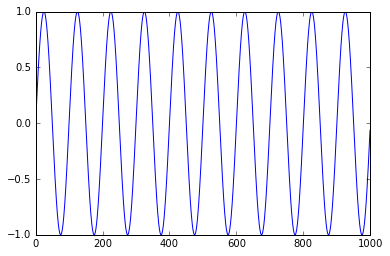

In [22]:
import matplotlib.pyplot as plt
plt.plot(dataset)
plt.show()

#### Function - Generate X and Y for the model

In [23]:
# convert an array of values into a dataset matrix
# look_back looks back previous (look_back - 1) datapoints
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Normalizing the dateset

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset) #normalize dataset into the range (0, 1)

#### Splitting the dataset into train and test datasets

In [25]:
train_size = int(len(dataset)*0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print train.shape
print test.shape

(670, 1)
(330, 1)


#### Window of 'look_back' time steps

In [26]:
look_back = 50

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print trainX.shape
print trainY.shape
print testX.shape
print testY.shape

(620, 50)
(620,)
(280, 50)
(280,)


#### Reshaping the trainX and testX into a format that is expected by Conv1D network. i.e. [samples, time steps, features].

In [27]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print 'trainX shape = ', trainX.shape
print 'testX shape   = ', testX.shape

print trainX[0], '=>' , trainY[0]
print trainX[1], '=>' , trainY[1]

trainX shape =  (620, 50, 1)
testX shape   =  (280, 50, 1)
[[0.5       ]
 [0.53139526]
 [0.56266662]
 [0.59369066]
 [0.62434494]
 [0.6545085 ]
 [0.68406228]
 [0.71288965]
 [0.74087684]
 [0.7679134 ]
 [0.79389263]
 [0.81871199]
 [0.84227355]
 [0.86448431]
 [0.88525662]
 [0.9045085 ]
 [0.92216396]
 [0.93815334]
 [0.95241353]
 [0.96488824]
 [0.97552826]
 [0.98429158]
 [0.99114363]
 [0.99605735]
 [0.99901336]
 [1.        ]
 [0.99901336]
 [0.99605735]
 [0.99114363]
 [0.98429158]
 [0.97552826]
 [0.96488824]
 [0.95241353]
 [0.93815334]
 [0.92216396]
 [0.9045085 ]
 [0.88525662]
 [0.86448431]
 [0.84227355]
 [0.81871199]
 [0.79389263]
 [0.7679134 ]
 [0.74087684]
 [0.71288965]
 [0.68406228]
 [0.6545085 ]
 [0.62434494]
 [0.59369066]
 [0.56266662]
 [0.53139526]] => 0.49999999999999983
[[0.53139526]
 [0.56266662]
 [0.59369066]
 [0.62434494]
 [0.6545085 ]
 [0.68406228]
 [0.71288965]
 [0.74087684]
 [0.7679134 ]
 [0.79389263]
 [0.81871199]
 [0.84227355]
 [0.86448431]
 [0.88525662]
 [0.9045085 ]
 [0.922

#### Building the model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, Flatten

verbose, epochs, batch_size = 1, 20, 64
n_timesteps, n_features, n_outputs = look_back, 1, 1
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_outputs, activation='linear'))
model.compile(loss=rmse, optimizer='adam', metrics=[rsquare])
model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/20
620/620 [==============================] - 5s 9ms/step - loss: 0.3211 - rsquare: 0.2250
Epoch 2/20
620/620 [==============================] - 4s 7ms/step - loss: 0.0496 - rsquare: 0.9785
Epoch 3/20
620/620 [==============================] - 4s 7ms/step - loss: 0.0400 - rsquare: 0.9879
Epoch 4/20
620/620 [==============================] - 4s 7ms/step - loss: 0.0342 - rsquare: 0.9893
Epoch 5/20
620/620 [==============================] - 5s 8ms/step - loss: 0.0242 - rsquare: 0.9947
Epoch 6/20
620/620 [==============================] - 4s 7ms/step - loss: 0.0422 - rsquare: 0.9848
Epoch 7/20
620/620 [==============================] - 4s 7ms/step - loss: 0.0378 - rsquare: 0.9885
Epoch 8/20
620/620 [==============================] - 4s 7ms/step - loss: 0.0240 - rsquare: 0.9950
Epoch 9/20
620/620 [==============================] - 4s 7ms/step - loss: 0.0205 - rsquare: 0.9961
Epoch 10/20
620/620 [==============================] - 4s 7ms/step - loss: 0.0188 - rsquare: 0.9972
Epoch 11/

In [29]:
trainScore = model.evaluate(trainX, trainY, batch_size=1, verbose=1)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, batch_size=1, verbose=1)
print('Test Score: ', testScore)

620/620 [==============================] - 6s 10ms/step
('Train Score: ', [0.1197078917475958, -inf])
280/280 [==============================] - 3s 10ms/step
('Test Score: ', [0.11799457417135792, -inf])


#### Predicting Future Values of Sine Function

In [30]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=1)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

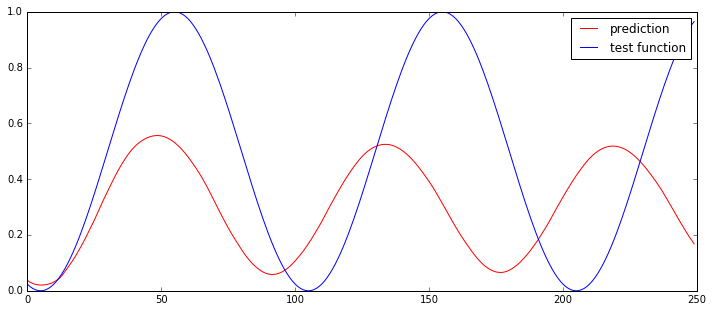

In [31]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()